### Synthetic signals : Estimation of the variance from the autocovariance

In [1]:
import xarray as xr
import numpy as np

from scipy import signal
import scipy.ndimage as im

import matplotlib.pyplot as plt

from sympy import Symbol, pi, atan, factor, lambdify

import sstats.hfreq as hf
import sstats.tseries as ts
import sstats.sigp as sigp
from sstats import get_cmap_colors
#import mitequinox.sigp as sp

rad = 2*np.pi

print_figs = True

In [2]:
#Load data
path = '/Users/zcaspar/codes/mit4320/' 

ds1 = xr.open_dataset(path+'synthetic_1_U.nc') #one draw
ds30 = xr.open_dataset(path+'synthetic_30_U_valid.nc') #30 draws
ds500 = xr.open_dataset(path+'synthetic_500_U_valid.nc') #500 draws
ds500_40 = xr.open_dataset(path+'synthetic_500_U_valid_80.nc') #500 draws
dsstat = xr.merge([xr.open_dataset(path+'variance_500.nc'),xr.open_dataset(path+'mean_500.nc')])


time = ds500.tau.values
time_80 = ds500_40.tau.values
print(time)

[0.00000000e+00 4.16666667e-02 8.33333333e-02 ... 2.49875000e+02
 2.49916667e+02 2.49958333e+02]


In [3]:
ds30 = ds30.assign_coords({'bandwidth':[d*2 for d in ds30.bandwidth]})

In [4]:
ds30 = ds30.sel(T=[5,15,30,80])
ds1 = ds1.sel(T=[5,15,30,80])

In [5]:
omega_M2 = 1.9322736142672448
omega_S2 = 2.0
omega = (omega_M2+omega_S2)/2

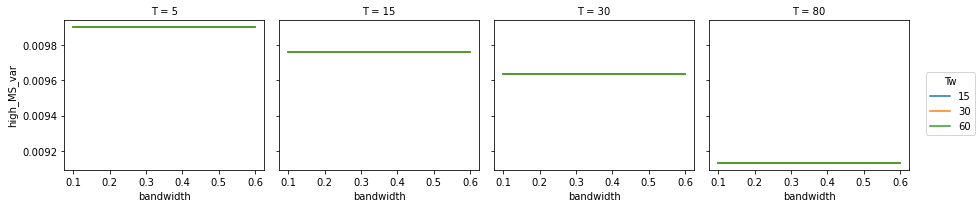

In [6]:
dsstat.high_MS_var.sel(U_high=0.1,T_low=100).plot(col='T',hue='Tw')

#### Monochromatic signal

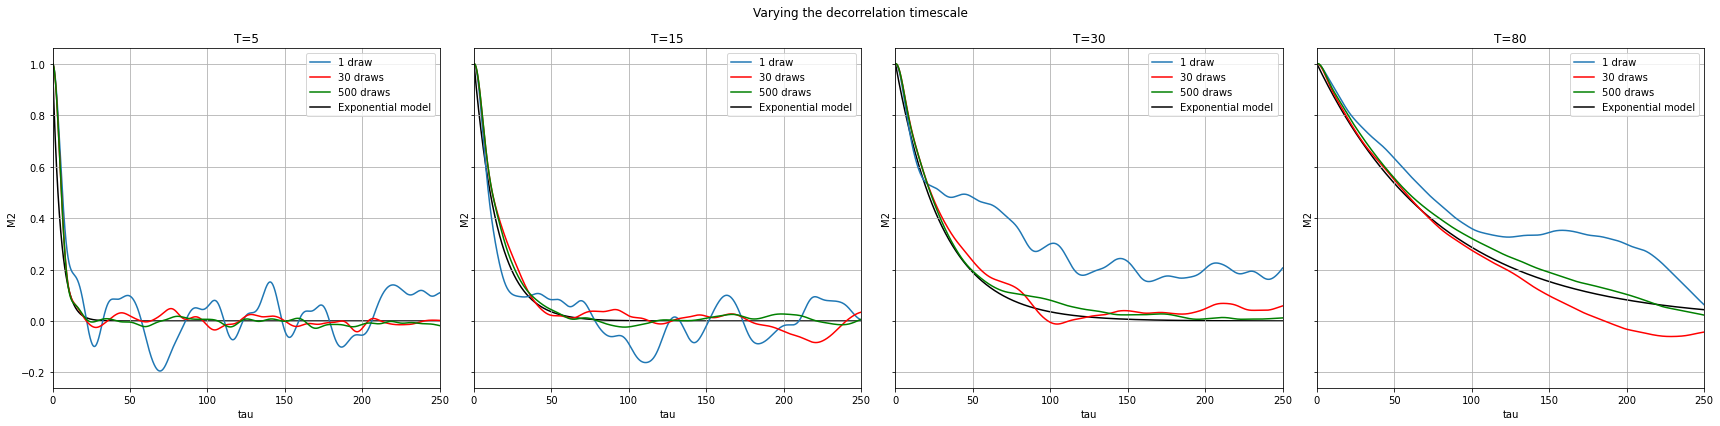

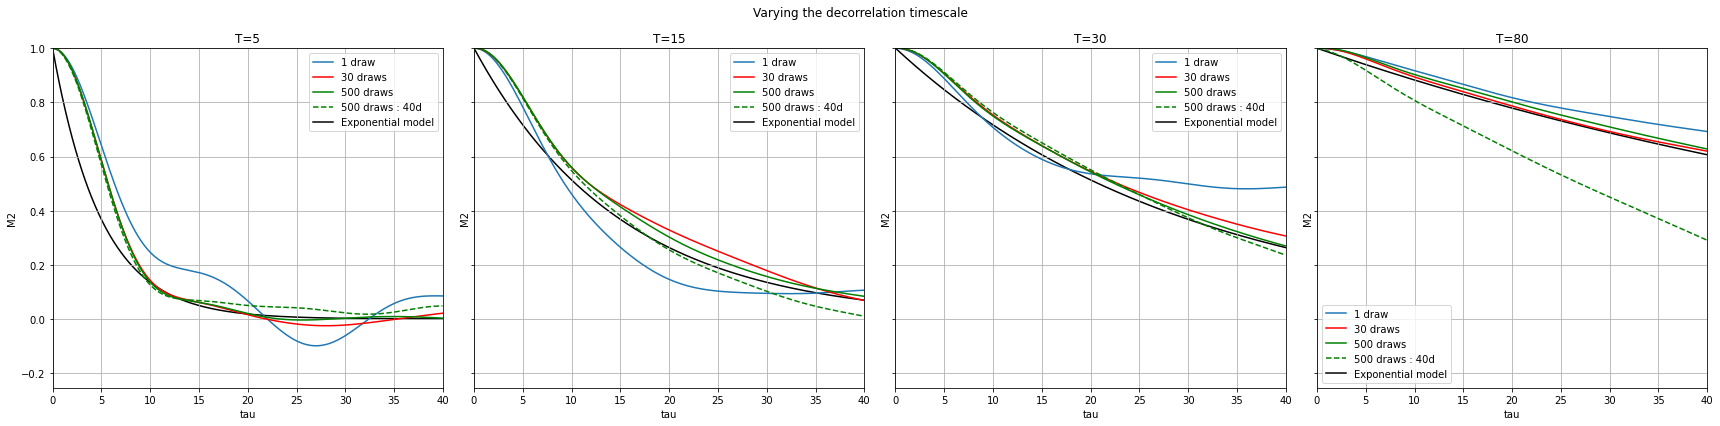

In [7]:
fig,ax = plt.subplots(1,ds1.T.size,figsize=(6*(ds1.T.size),6),sharey=True)
for i,t in enumerate(ds1.T):
    (ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t).plot(ax=ax[i],label='1 draw',xlim=(0,250))
    (ds30.M2/ds30.M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t,T_low=30
                                     ).plot(ax=ax[i],label='30 draws',c='r',xlim=(0,250))
    (ds500.M2/ds500.M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t,T_low=30
                                     ).plot(ax=ax[i],label='500 draws',c='g')
    ax[i].plot(time,np.exp(-time/t.values),c='k',zorder=0,label='Exponential model')
    ax[i].set_title('T=%s'%t.values);ax[i].grid();ax[i].legend()
fig.suptitle('Varying the decorrelation timescale');
fig.tight_layout();

fig,ax = plt.subplots(1,ds1.T.size,figsize=(6*(ds1.T.size),6),sharey=True)
for i,t in enumerate(ds1.T):
    (ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t).plot(ax=ax[i],label='1 draw',xlim=(0,40))
    (ds30.M2/ds30.M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t,T_low=30
                                     ).plot(ax=ax[i],label='30 draws',c='r',xlim=(0,40))
    (ds500.M2/ds500.M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t,T_low=30
                                     ).plot(ax=ax[i],label='500 draws',c='g',xlim=(0,40))
    (ds500_40.M2/ds500_40.M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t,T_low=30
                                     ).plot(ax=ax[i],label='500 draws : 40d',c='g',linestyle='--',xlim=(0,40))
    ax[i].plot(time_80,np.exp(-time_80/t.values),c='k',zorder=0,label='Exponential model')
    ax[i].set_title('T=%s'%t.values);ax[i].grid();ax[i].legend();
    ax[i].set_ylim(None,1)
fig.suptitle('Varying the decorrelation timescale');
fig.tight_layout();

#fig,ax = plt.subplots(1,ds1.T.size,figsize=(6*(ds1.T.size),6),sharey=True)
#for i,t in enumerate(ds1.T):
#   (ds30_80.M2/ds30_80.M2.isel(tau=0)).sel(bandwidth=0.2,Tw=30,U_high=0.1,T=t,T_low=30
#                                 ).plot(ax=ax[i],label='30 draws',c='r')
    #ax[i].plot(time_80,np.exp(-time_80/t.values),c='k',zorder=0,label='Exponential model')
#    ax[i].set_title('T=%s'%t.values);ax[i].grid();ax[i].legend()
#fig.suptitle('Varying the decorrelation timescale');
#fig.tight_layout();

In [8]:
Var = ds500.sel(tau=0)
Var_40 = ds500_40.sel(tau=0)
#Var_30 = ds30.sel(tau=0)
ds = xr.merge([dsstat,Var])
#Var


In [9]:
ds

<xarray.Dataset>
Dimensions:                     (T: 4, T_low: 3, Tw: 3, U_high: 5, bandwidth: 4)
Coordinates:
  * T                           (T) int64 5 15 30 80
  * U_high                      (U_high) float64 0.01 0.05 0.1 1.0 2.0
  * T_low                       (T_low) int64 5 30 100
  * Tw                          (Tw) int64 15 30 60
  * bandwidth                   (bandwidth) float64 0.1 0.2 0.4 0.6
    tau                         float64 0.0
Data variables:
    M2_var                      (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2_bpassed_var              (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2_demodulated_var          (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2_demodulated_energy       (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_var                      (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_bpassed_var              (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_demodulated_var          (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_demodulated_energy       (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_var                 (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_bpassed_var         (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_demodulated_var     (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_demodulated_energy  (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_var                   (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_bpassed_var           (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_demodulated_var       (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_demodulated_energy    (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2_mean                     (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2_bpassed_mean             (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2_demodulated_mean         (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_mean                     (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_bpassed_mean             (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2_demodulated_mean         (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_mean                (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_bpassed_mean        (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS_demodulated_mean    (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_mean                  (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_bpassed_mean          (Tw, bandwidth, U_high, T, T_low) float64 ...
    total_demodulated_mean      (Tw, bandwidth, U_high, T, T_low) float64 ...
    M2                          (Tw, bandwidth, U_high, T, T_low) float64 ...
    S2                          (Tw, bandwidth, U_high, T, T_low) float64 ...
    high_MS                     (Tw, bandwidth, U_high, T, T_low) float64 ...
    total                       (Tw, bandwidth, U_high, T, T_low) float64 ...

Text(0.5, 0.98, 'Estimation of variance from autocovariance')

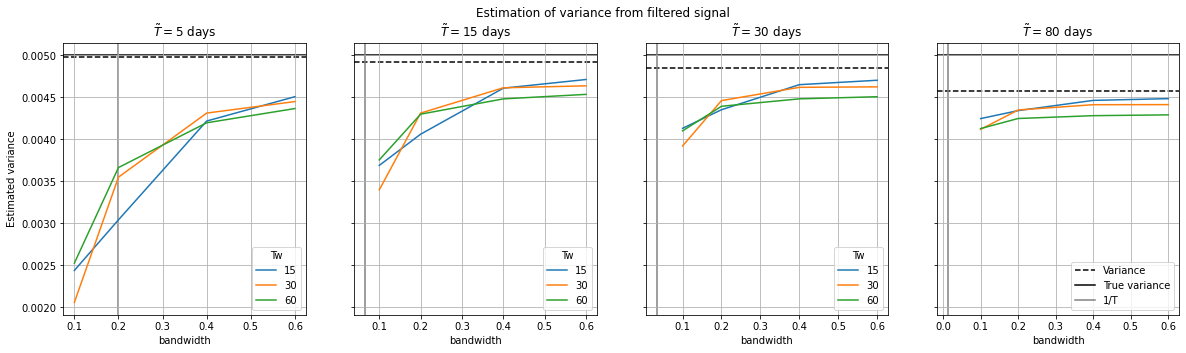

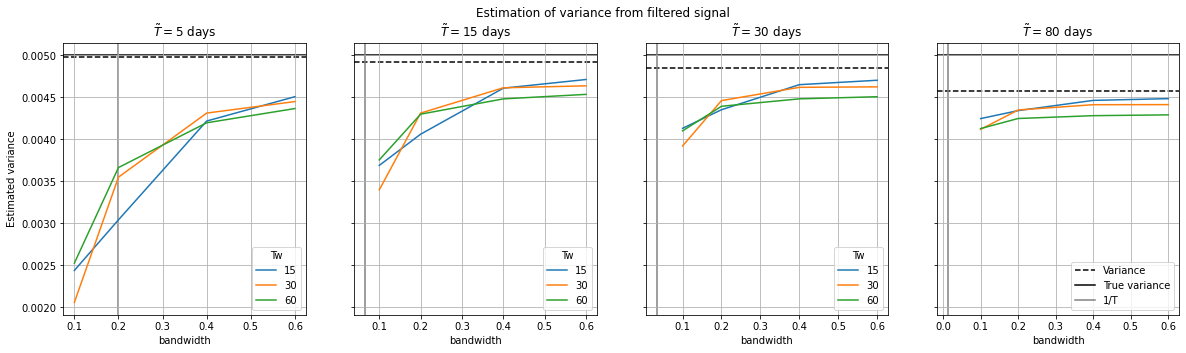

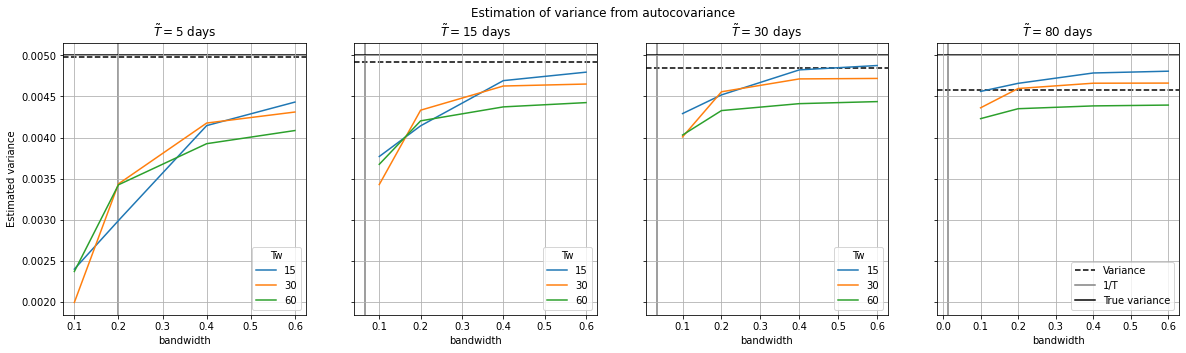

In [12]:
fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    ds.sel(T_low=5,U_high=0.1,T=t).M2_bpassed_var.plot(hue='Tw',ax=ax[i],add_legend=True)
#    ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var.plot(ax=ax[i],c='k',linestyle='--',add_legend=False)
    ax[i].grid();ax[i].axhline(ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var[0],c='k',linestyle='--',zorder=0,label='Variance')
    ax[i].axhline(0.005,c='k',linestyle='-',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T');
    ax[i].set_title(r'$\tilde T=$%s days'%t.values)
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Estimation of variance from filtered signal')

fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    (0.5*ds.sel(T_low=5,U_high=0.1,T=t).M2_demodulated_energy).plot(hue='Tw',ax=ax[i],add_legend=True)
#    ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var.plot(ax=ax[i],c='k',linestyle='--',add_legend=False)
    ax[i].grid();ax[i].axhline(ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var[0],c='k',linestyle='--',zorder=0,label='Variance')
    ax[i].axhline(0.005,c='k',linestyle='-',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T');
    ax[i].set_title(r'$\tilde T=$%s days'%t.values)
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Estimation of variance from filtered signal')

fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    ds.sel(T_low=5,U_high=0.1,T=t).M2.plot(hue='Tw',ax=ax[i],add_legend=True)
#    ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var.plot(ax=ax[i],c='k',linestyle='--',add_legend=False)
    ax[i].grid();ax[i].axhline(ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var[0],c='k',linestyle='--',zorder=0,label='Variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T');
    ax[i].axhline(0.005,c='k',linestyle='-',zorder=0,label='True variance')
    ax[i].set_title(r'$\tilde T=$%s days'%t.values)
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Estimation of variance from autocovariance')

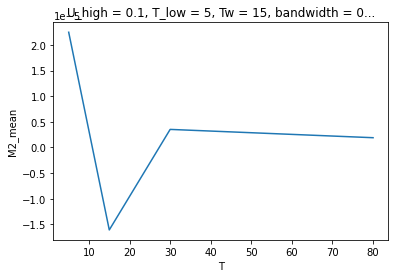

In [107]:
ds.M2_mean.sel(U_high=0.1,T_low=5,Tw=15,bandwidth=0.4).plot()

#### High frequency

In [13]:
sigma0 = ds.sel(bandwidth=0.4,Tw=30,T_low=30).high_MS_var
true_var = ds.U_high

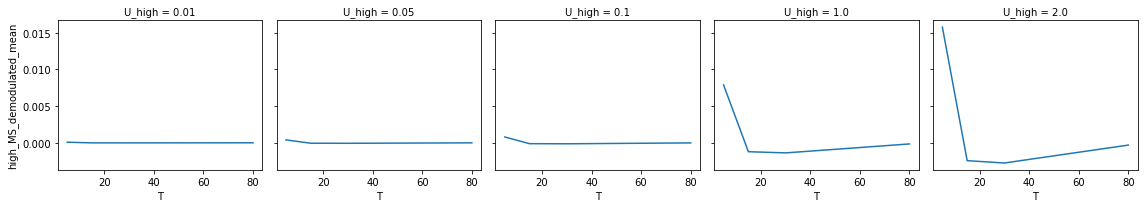

In [14]:
ds.high_MS_demodulated_mean.sel(bandwidth=0.4,Tw=30,T_low=30).plot(col='U_high')

In [15]:
omega_S2-omega_M2+1/15

0.1343930523994219

In [ ]:
labels = ['15days','30days','60days']
#cmap = plt.get_cmap('bone')
custom_lines = [
                Line2D([0], [0], color=cmap(.6), lw=width_E,linestyle ='--'),
                Line2D([0], [0], color=cmap(.6), lw=1,marker='.')
               ]

Text(0.5, 0.98, 'Estimation of variance from autocovariance')

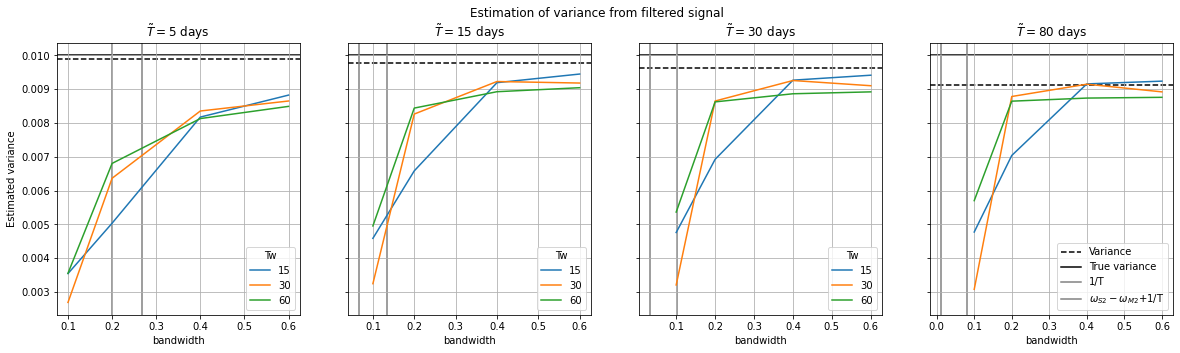

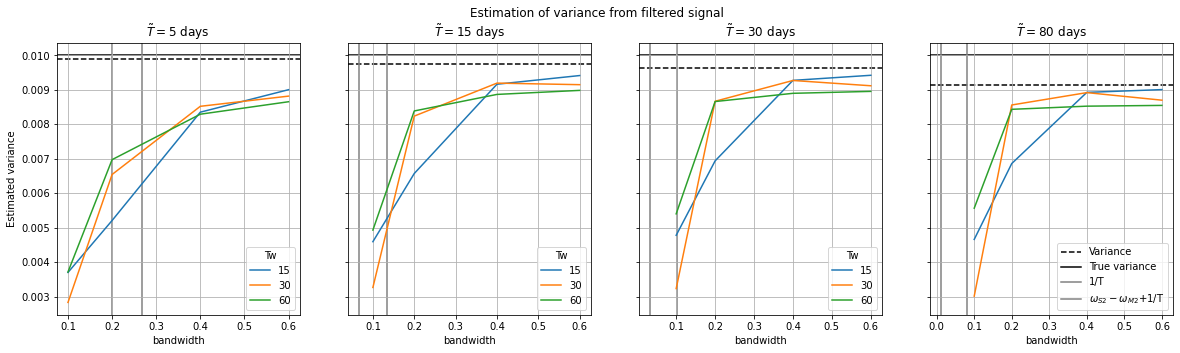

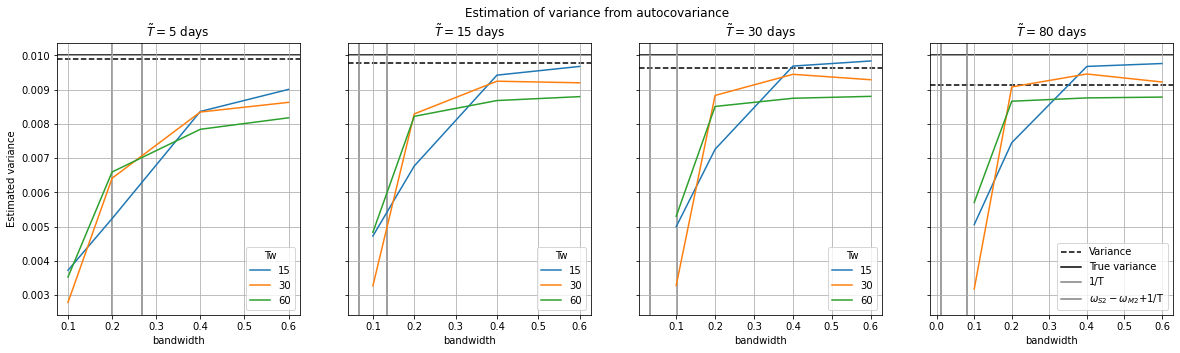

In [26]:
fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    ds.sel(T_low=5,U_high=0.1,T=t).high_MS_demodulated_var.plot(hue='Tw',ax=ax[i],add_legend=True)
#    ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var.plot(ax=ax[i],c='k',linestyle='--',add_legend=False)
    ax[i].grid();ax[i].axhline(sigma0.sel(U_high=0.1,T=t),c='k',linestyle='--',zorder=0,label='Variance')
    ax[i].axhline(true_var.sel(U_high=0.1)**2,c='k',linestyle='-',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T');
    ax[i].set_title(r'$\tilde T=$%s days'%t.values);
    ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Estimation of variance from filtered signal')

fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    (0.5*ds.sel(T_low=5,U_high=0.1,T=t).high_MS_demodulated_energy).plot(hue='Tw',ax=ax[i],add_legend=True)
#    ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var.plot(ax=ax[i],c='k',linestyle='--',add_legend=False)
    ax[i].grid();ax[i].axhline(sigma0.sel(U_high=0.1,T=t),c='k',linestyle='--',zorder=0,label='Variance')
    ax[i].axhline(true_var.sel(U_high=0.1)**2,c='k',linestyle='-',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T');
    ax[i].set_title(r'$\tilde T=$%s days'%t.values);
    ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Estimation of variance from filtered signal')

fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    ds.sel(T_low=5,U_high=0.1,T=t).high_MS.plot(hue='Tw',ax=ax[i],add_legend=True)
#    ds.sel(T_low=5,U_high=0.1,T=t,Tw=60).M2_var.plot(ax=ax[i],c='k',linestyle='--',add_legend=False)
    ax[i].grid();ax[i].axhline(sigma0.sel(U_high=0.1,T=t),c='k',linestyle='--',zorder=0,label='Variance')
    ax[i].axhline(true_var.sel(U_high=0.1)**2,c='k',linestyle='-',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T');
    ax[i].set_title(r'$\tilde T=$%s days'%t.values);
    ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Estimation of variance from autocovariance')

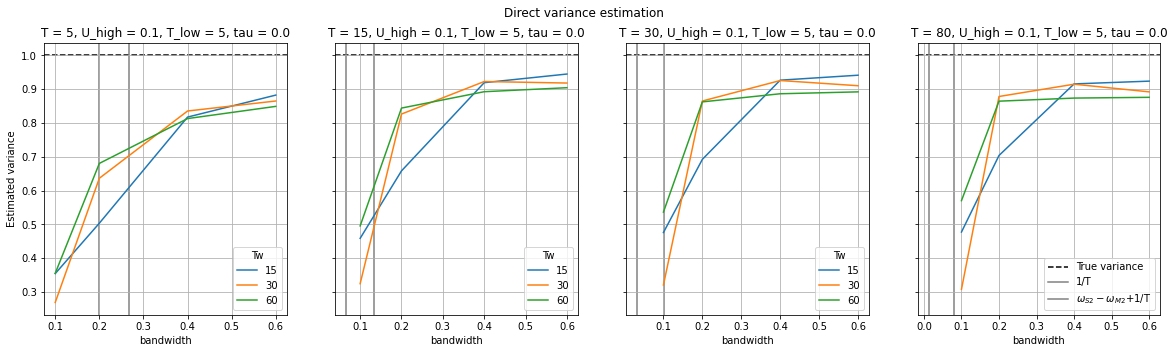

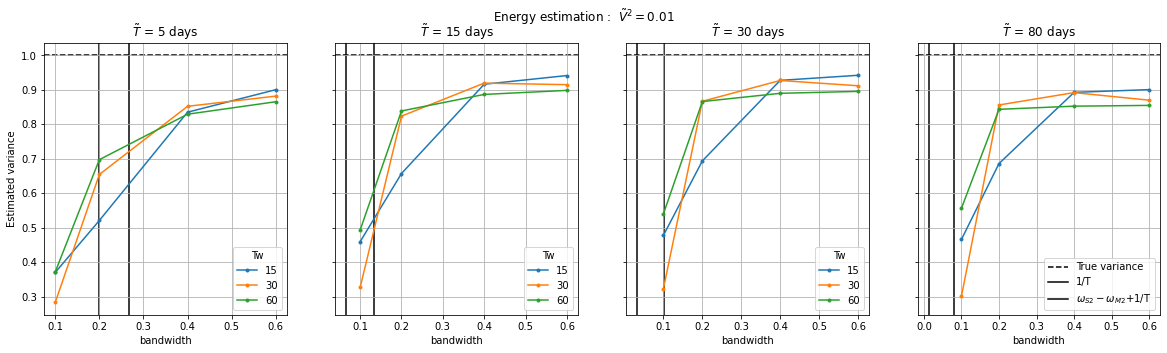

Text(0.5, 0.98, 'Direct variance estimation')

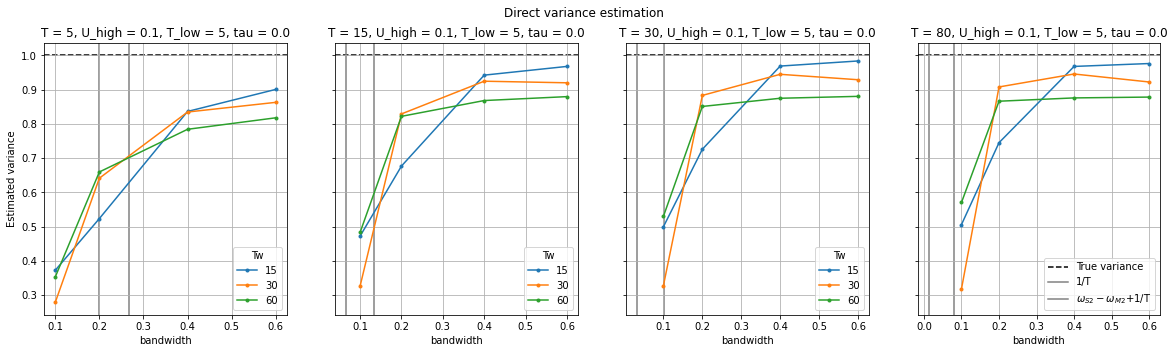

In [33]:
fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    (ds.sel(T_low=5,U_high=0.1,T=t).high_MS_demodulated_var/true_var.sel(U_high=0.1)**2).plot(hue='Tw',ax=ax[i],add_legend=True)
    ax[i].grid();
    ax[i].axhline(1,c='k',linestyle='--',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T')
    ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Direct variance estimation')

fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    (0.5*ds.sel(T_low=5,U_high=0.1,T=t).high_MS_demodulated_energy/true_var.sel(U_high=0.1)**2
    ).plot(hue='Tw',ax=ax[i],add_legend=True,marker='.')
    ax[i].grid();
    ax[i].axhline(1,c='k',linestyle='--',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='k',zorder=0,label='1/T')
    ax[i].axvline(omega_S2-omega_M2+1/t,c='k',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T');
    ax[i].set_title(r'$\tilde T$ = %s days'%t.values)
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle(r'Energy estimation :  $\tilde V^2= 0.01$')
plt.show()
fig.savefig('/Users/zcaspar/codes/mit4320/energy_estimates_omegaT.pdf')

fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
for i,t in enumerate(Var.T):
    (ds.sel(T_low=5,U_high=0.1,T=t).high_MS/true_var.sel(U_high=0.1)**2).plot(hue='Tw',ax=ax[i],add_legend=True,marker='.')
    ax[i].grid();
    ax[i].axhline(1,c='k',linestyle='--',zorder=0,label='True variance')
    ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T')
    ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
ax[0].set_ylabel('Estimated variance')
ax[-1].legend();fig.suptitle('Direct variance estimation')

#### Signal total

In [49]:
number = Var.U_high.values.size
cmap = plt.get_cmap('YlOrBr')
colors = [cmap(i) for i in np.linspace(0.5, 1., number)]

In [59]:
true_var

<xarray.DataArray 'U_high' (U_high: 5)>
array([0.01, 0.05, 0.1 , 1.  , 2.  ])
Coordinates:
  * U_high   (U_high) float64 0.01 0.05 0.1 1.0 2.0
    tau      float64 0.0

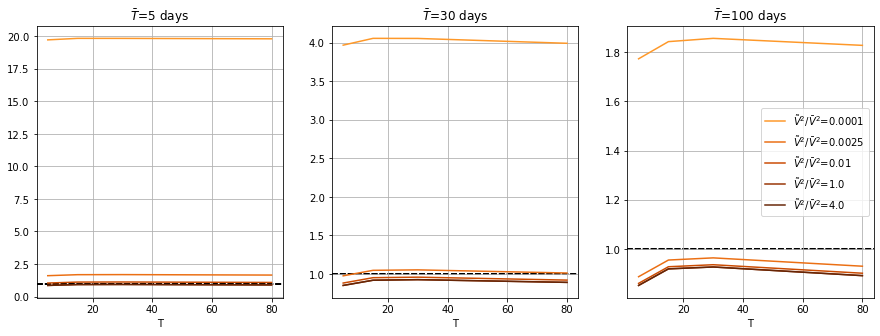

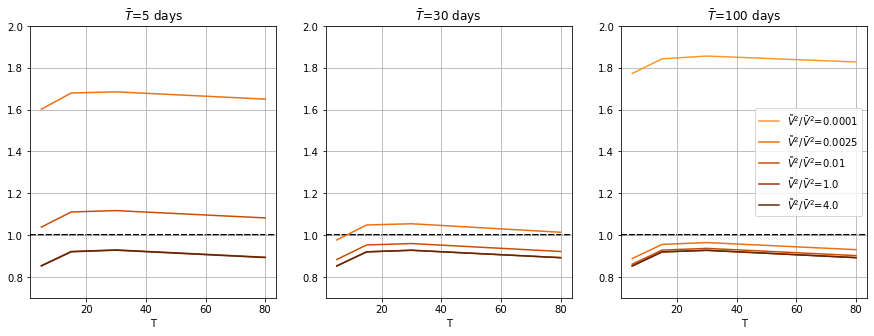

In [86]:
fig,axs = plt.subplots(1,Var.T_low.size,figsize=(5*Var.T_low.size,5))
for j,tl in enumerate(Var.T_low):
    ax = axs[j]
    for i,U in enumerate(Var.U_high):
        ax.axhline(1,c='k',linestyle='--',zorder=-1)
        (0.5*ds.total_demodulated_energy.sel(bandwidth=0.4,T_low=tl,Tw=30,U_high=U)/(true_var.sel(U_high=U)**2)
        ).plot(ax=ax,c=colors[i],
               label=r'$\tilde V^2/\bar V^2$=%s'%(np.around(true_var.sel(U_high=U).values**2,decimals=4)))
    ax.grid();ax.set_title(r'$\bar T$=%s days'%tl.values);
ax.legend();
fig.savefig('/Users/zcaspar/codes/mit4320/energy_estimates_lowratio.pdf')

fig,axs = plt.subplots(1,Var.T_low.size,figsize=(5*Var.T_low.size,5))
for j,tl in enumerate(Var.T_low):
    ax = axs[j]
    for i,U in enumerate(Var.U_high):
        ax.axhline(1,c='k',linestyle='--',zorder=-1)
        (0.5*ds.total_demodulated_energy.sel(bandwidth=0.4,T_low=tl,Tw=30,U_high=U)/(true_var.sel(U_high=U)**2)
        ).plot(ax=ax,c=colors[i],
               label=r'$\tilde V^2/\bar V^2$=%s'%(np.around(true_var.sel(U_high=U).values**2,decimals=4)))
    ax.grid();ax.set_title(r'$\bar T$=%s days'%tl.values);
    ax.set_ylim(0.7,2)
ax.legend();
fig.savefig('/Users/zcaspar/codes/mit4320/energy_estimates_lowratio_bis.pdf')

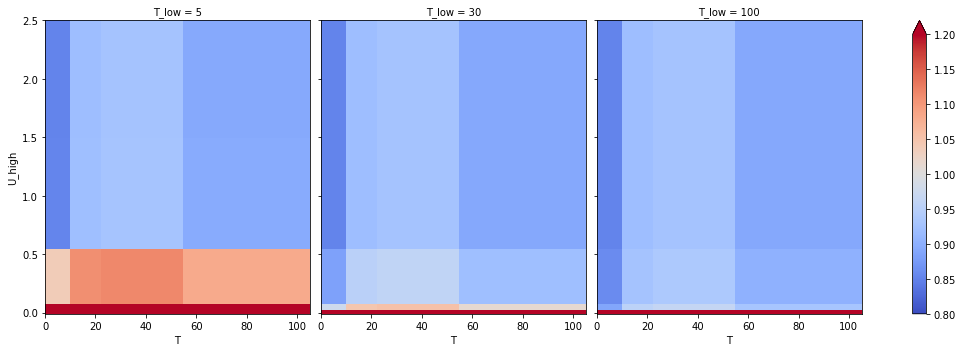

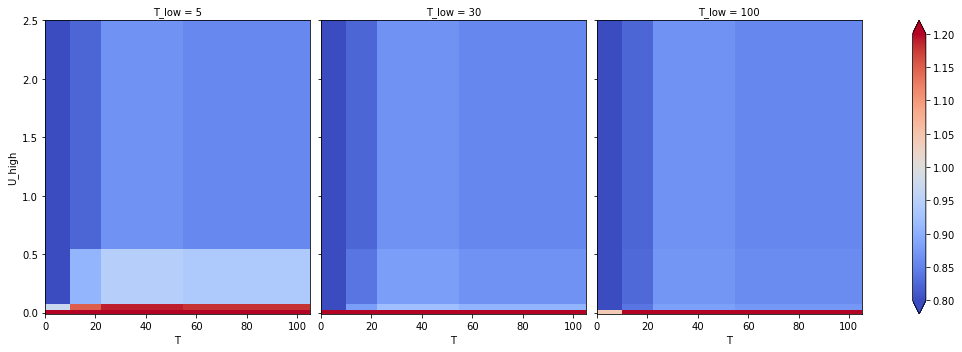

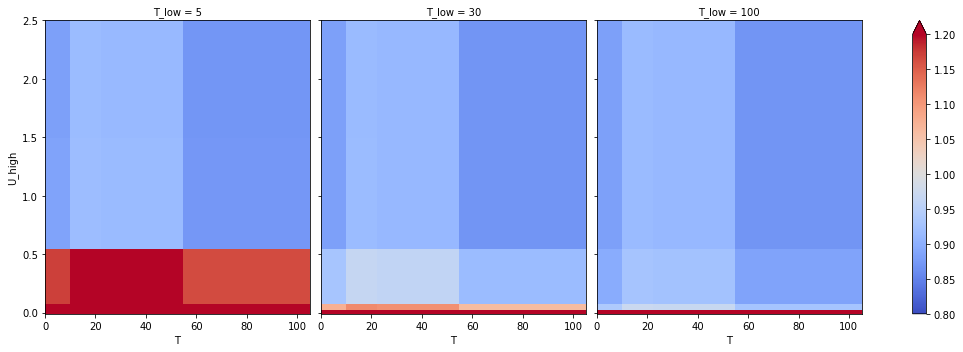

In [88]:
(0.5*ds.total_demodulated_energy.sel(bandwidth=0.4,Tw=30)/(true_var**2)
).plot(cmap='coolwarm',vmax=1.2,vmin=0.8,col='T_low',figsize=(15,5))
plt.savefig('/Users/zcaspar/codes/mit4320/energy_estimates_lowratio2D.pdf')

(0.5*ds.total_demodulated_energy.sel(bandwidth=0.2,Tw=30)/(true_var**2)
).plot(cmap='coolwarm',vmax=1.2,vmin=0.8,col='T_low',figsize=(15,5))

(0.5*ds.total_demodulated_energy.sel(bandwidth=0.6,Tw=30)/(true_var**2)
).plot(cmap='coolwarm',vmax=1.2,vmin=0.8,col='T_low',figsize=(15,5))

(0.65, 3.0)

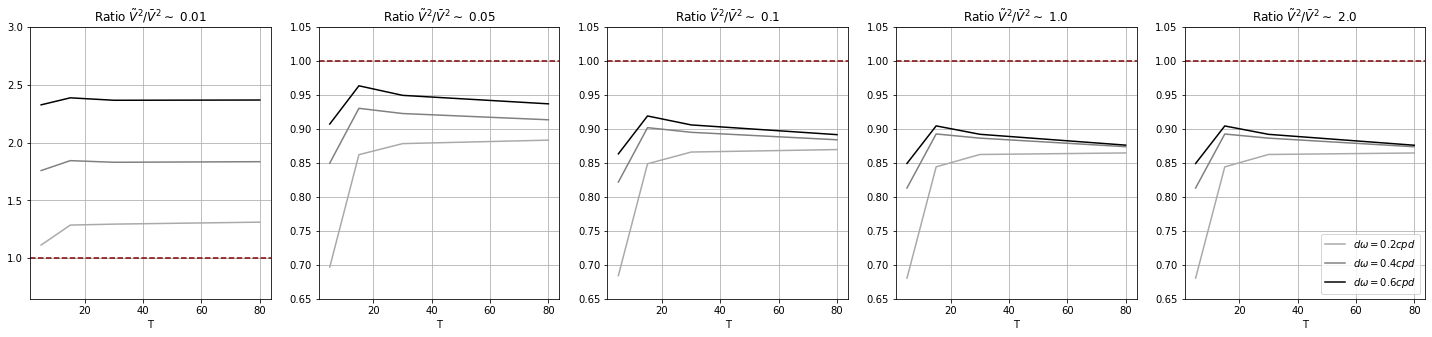

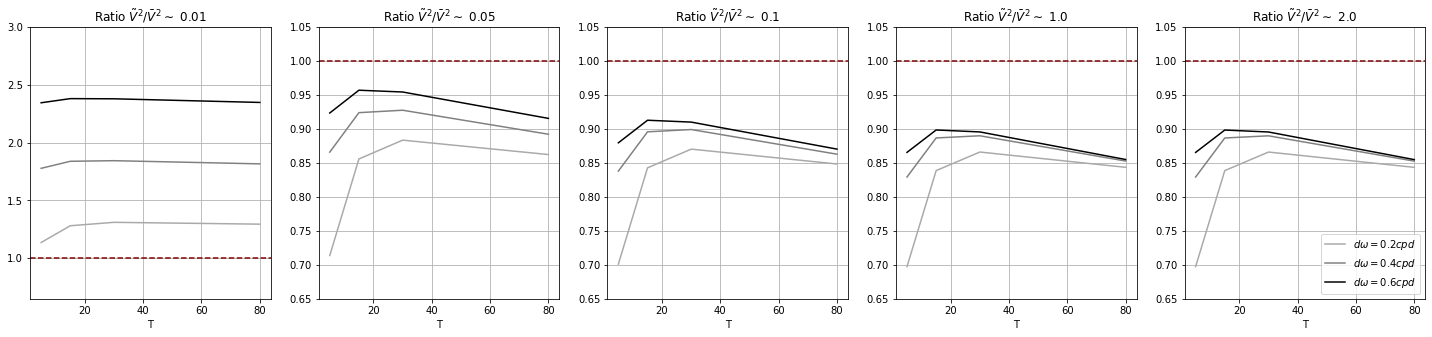

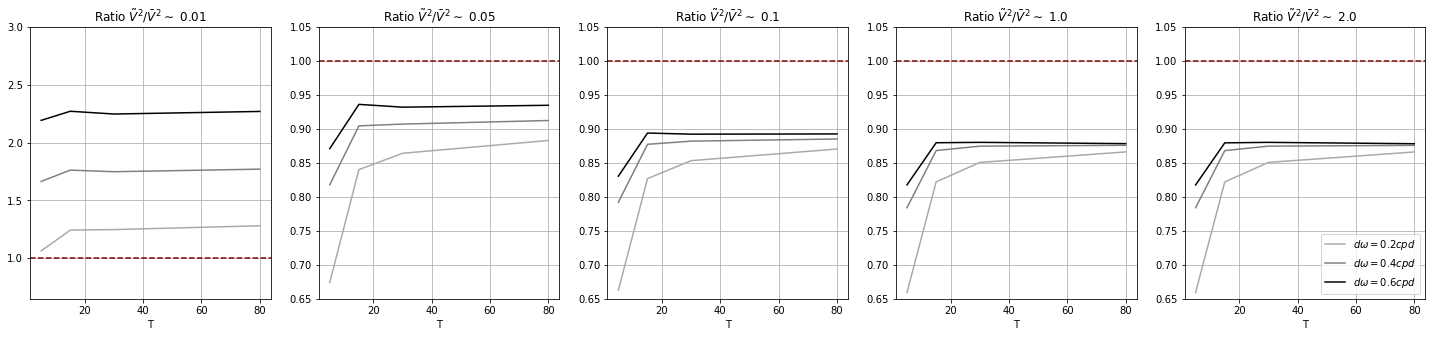

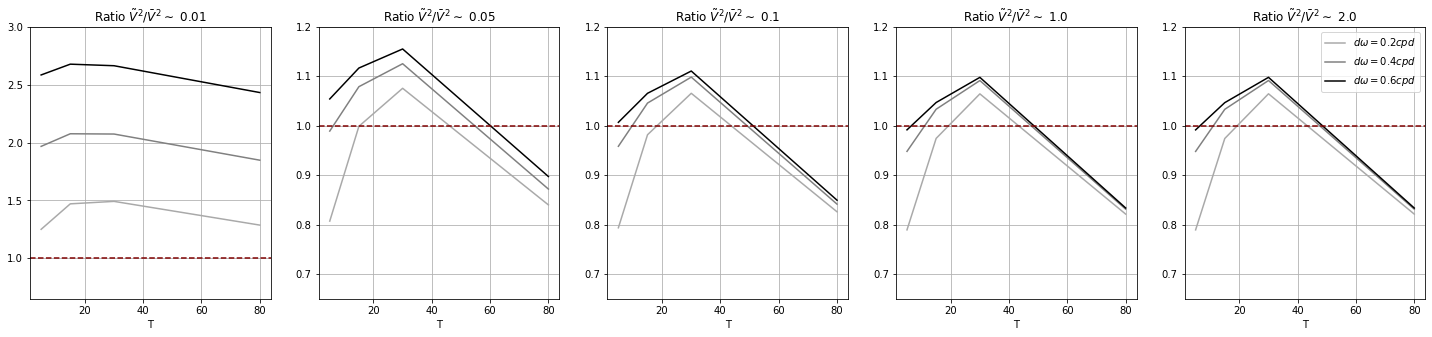

In [22]:
fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total_demodulated_var.sel(bandwidth=0.2,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total_demodulated_var.sel(bandwidth=0.4,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (ds.total_demodulated_var.sel(bandwidth=0.6,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$',ylim=(0.65,1.05))
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();ax[0].set_ylim(None,3) 

fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (0.5*ds.total_demodulated_energy.sel(bandwidth=0.2,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (0.5*ds.total_demodulated_energy.sel(bandwidth=0.4,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (0.5*ds.total_demodulated_energy.sel(bandwidth=0.6,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$',ylim=(0.65,1.05))
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();ax[0].set_ylim(None,3) 

fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total.sel(bandwidth=0.2,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total.sel(bandwidth=0.4,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (ds.total.sel(bandwidth=0.6,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$',ylim=(0.65,1.05))
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();
ax[0].set_ylim(None,3)
fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (Var_40.total.sel(bandwidth=0.2,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (Var_40.total.sel(bandwidth=0.4,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (Var_40.total.sel(bandwidth=0.6,T_low=100,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$',ylim=(0.65,1.2))
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();

ax[0].set_ylim(None,3) 
#(Var.sel(bandwidth=0.4,T_low=30,Tw=30)/).total.plot(col='U_high')

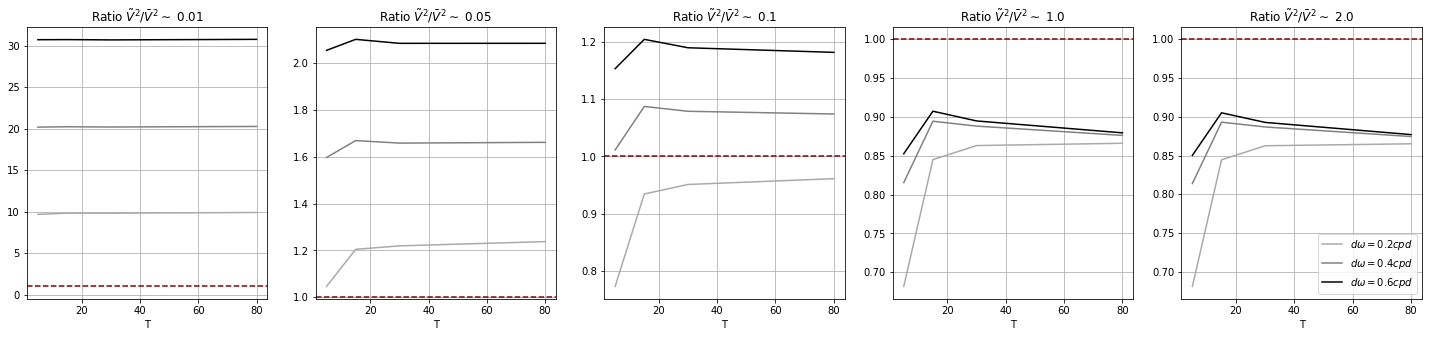

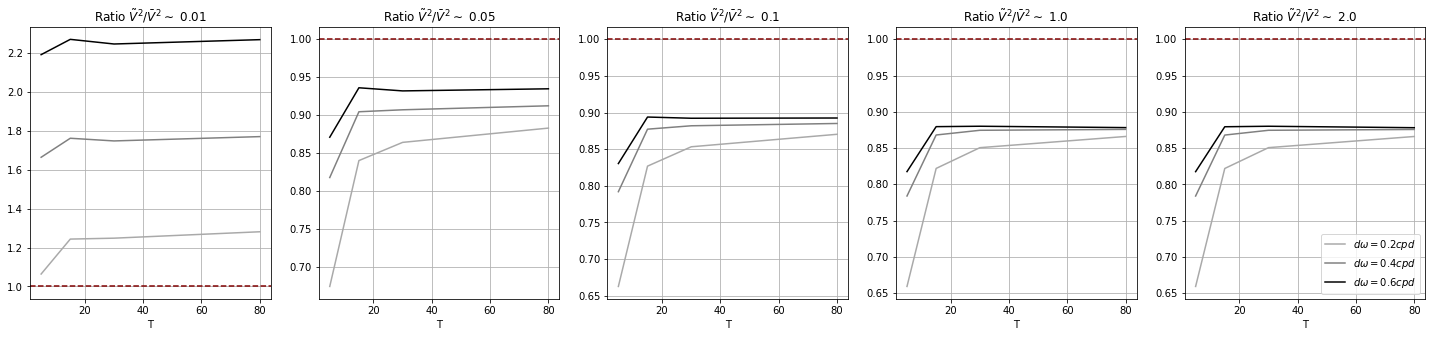

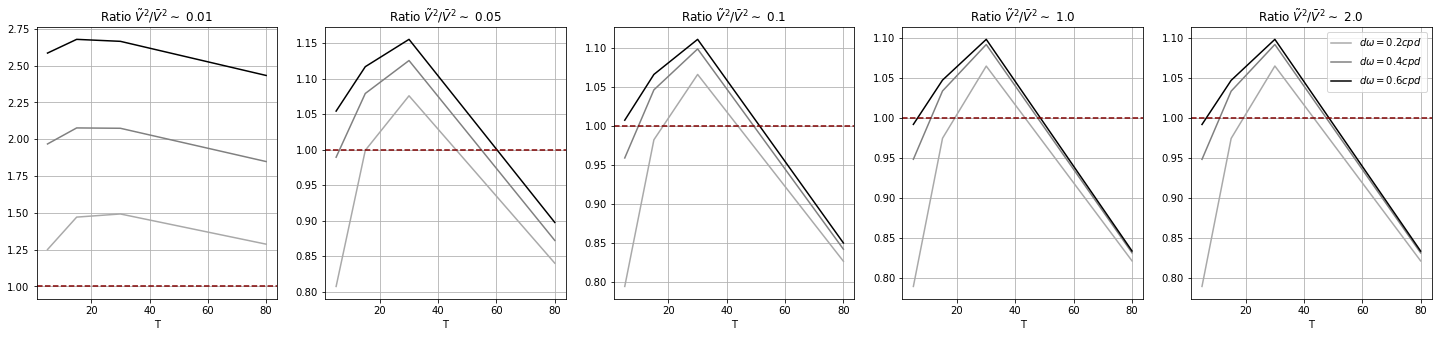

In [126]:
tlow = 5
fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total_demodulated_var.sel(bandwidth=0.2,T_low=tlow,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total_demodulated_var.sel(bandwidth=0.4,T_low=tlow,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (ds.total_demodulated_var.sel(bandwidth=0.6,T_low=tlow,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$')#,ylim=(0.65,1.05)
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();

fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total.sel(bandwidth=0.2,T_low=tl,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (ds.total.sel(bandwidth=0.4,T_low=tl,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (ds.total.sel(bandwidth=0.6,T_low=tl,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$')#,ylim=(0.65,1.05)
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();
#ax[0].set_ylim(None,3)
fig,ax = plt.subplots(1,Var.U_high.size,figsize=(5*Var.U_high.size,5))
for i,U in enumerate(Var.U_high):
#    (Var/(Var.U_high**2)).sel(bandwidth=0.2,T_low=100,Tw=30,U_high=U
#                             ).total.plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (Var_40.total.sel(bandwidth=0.2,T_low=tl,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='darkgrey',label=r'$d\omega = 0.2cpd$')
    (Var_40.total.sel(bandwidth=0.4,T_low=tl,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='grey',label=r'$d\omega = 0.4cpd$')
    (Var_40.total.sel(bandwidth=0.6,T_low=tl,Tw=60,U_high=U)/(true_var.sel(U_high=U)**2)
    ).plot(ax=ax[i],linestyle='-',c='k',label=r'$d\omega = 0.6cpd$')#,ylim=(0.65,1.2)
    ax[i].axhline(1,linestyle='--',c='maroon')
    ax[i].grid();
    ax[i].set_title(r'Ratio $\tilde V^2/\bar V^2 \sim$ %s'%(U).values);
ax[-1].legend();

#ax[0].set_ylim(None,3) 
#(Var.sel(bandwidth=0.4,T_low=30,Tw=30)/).total.plot(col='U_high')

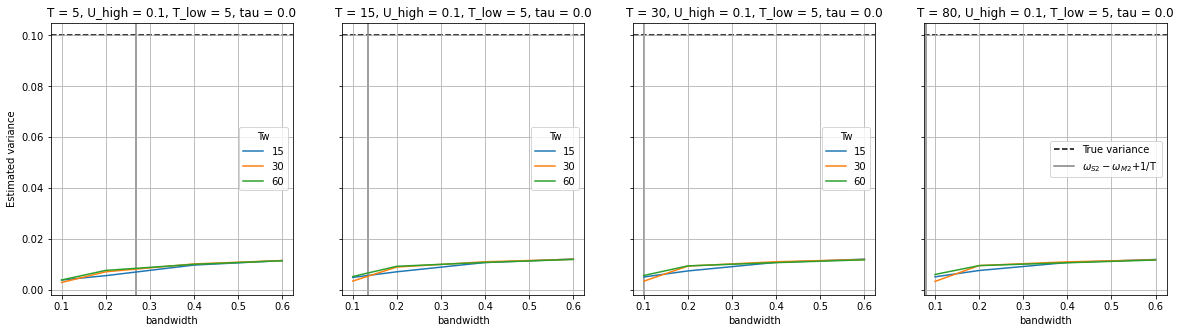

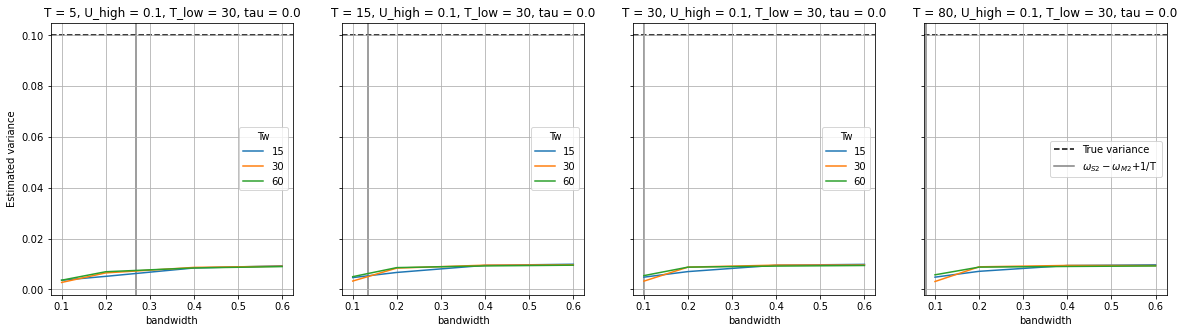

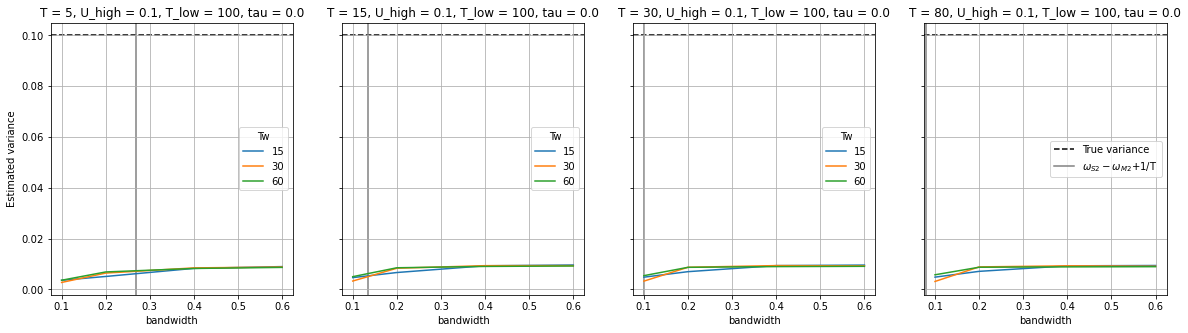

In [122]:
for tl in Var.T_low:
    fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
    for i,t in enumerate(Var.T):
        ds.sel(T_low=tl,U_high=0.1,T=t).total_demodulated_var.plot(hue='Tw',ax=ax[i],add_legend=True)
        ax[i].grid();ax[i].axhline(true_var.sel(U_high=0.1),c='k',linestyle='--',zorder=0,label='True variance')
        ax[i].set_ylabel('');
        ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
    ax[0].set_ylabel('Estimated variance')
    ax[-1].legend();
    
    

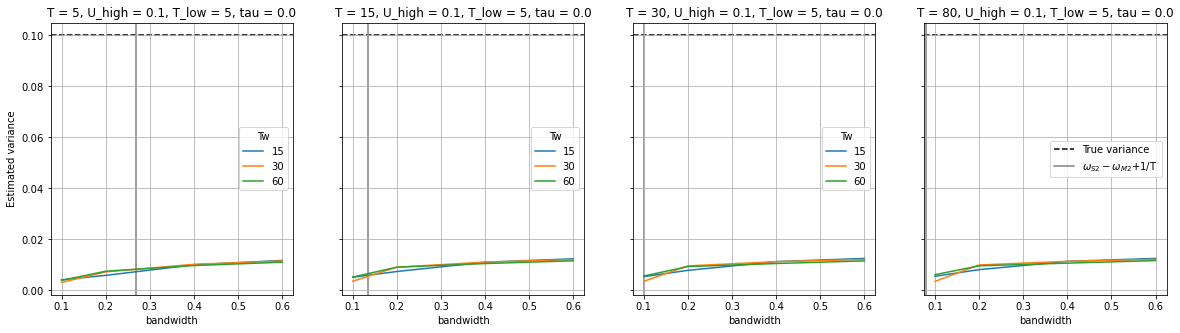

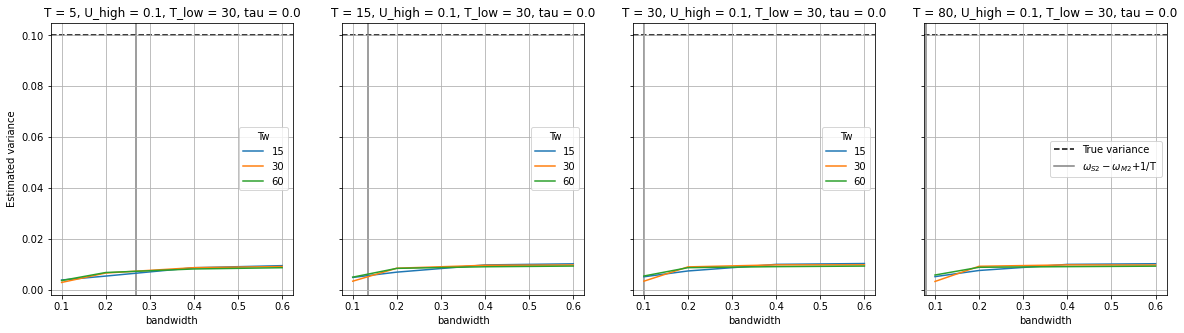

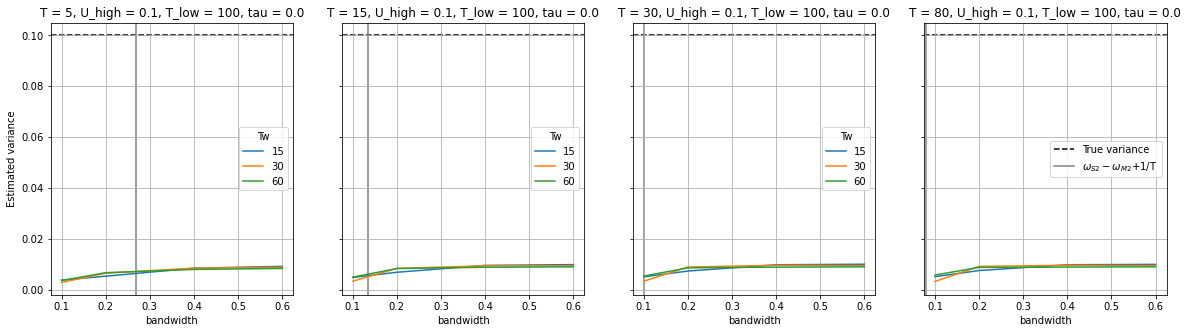

In [123]:
for tl in Var.T_low:
    fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
    for i,t in enumerate(Var.T):
        ds.sel(T_low=tl,U_high=0.1,T=t).total.plot(hue='Tw',ax=ax[i],add_legend=True)
        ax[i].grid();ax[i].axhline(true_var.sel(U_high=0.1),c='k',linestyle='--',zorder=0,label='True variance')
        ax[i].set_ylabel('');
        ax[i].axvline(omega_S2-omega_M2+1/t,c='grey',zorder=0,label=r'$\omega_{S2}-\omega_{M2}$+1/T')
    ax[0].set_ylabel('Estimated variance')
    ax[-1].legend();
    
    

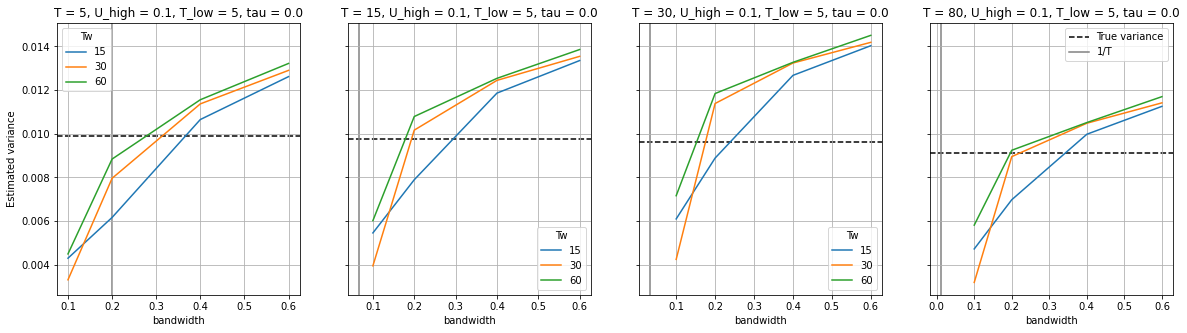

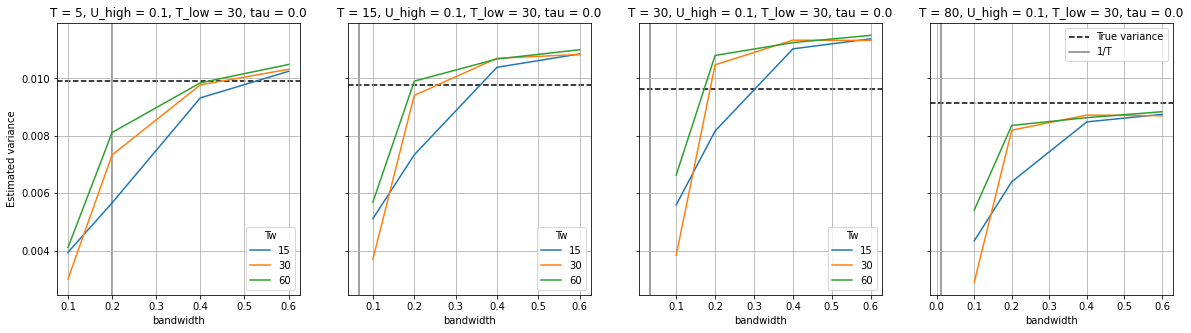

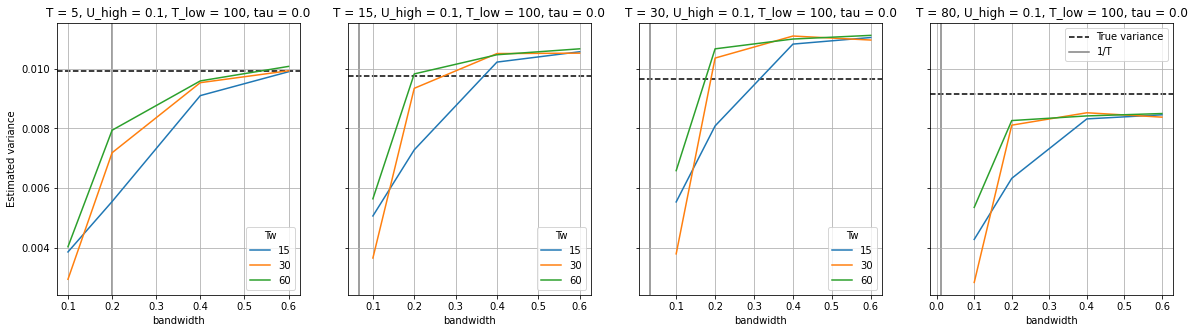

In [74]:
for tl in Var.T_low:
    fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
    for i,t in enumerate(Var.T):
        Var_40.sel(T_low=tl,U_high=0.1,T=t).total.plot(hue='Tw',ax=ax[i],add_legend=True)
        ax[i].grid();ax[i].axhline(true_var.sel(T=t,U_high=0.1),c='k',linestyle='--',zorder=0,label='True variance')
        ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T')
    ax[0].set_ylabel('Estimated variance')
    ax[-1].legend();

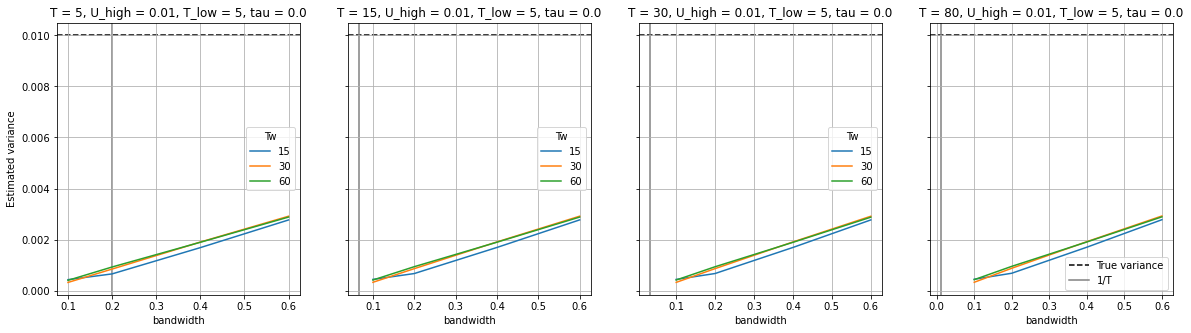

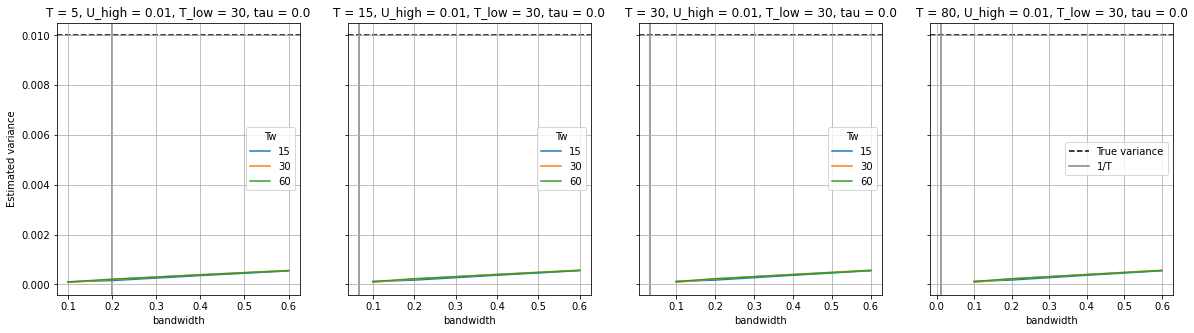

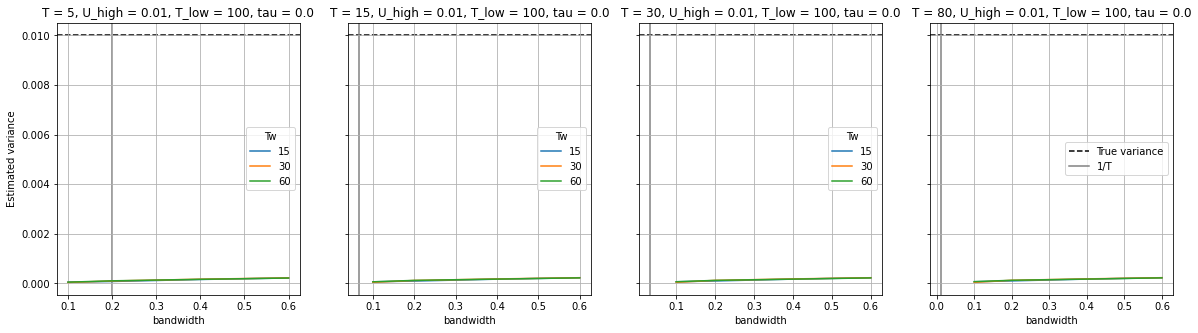

In [48]:
for tl in Var.T_low:
    fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
    for i,t in enumerate(Var.T):
        Var.sel(T_low=tl,U_high=0.01,T=t).total.plot(hue='Tw',ax=ax[i],add_legend=True)
        ax[i].grid();ax[i].axhline(0.01,c='k',linestyle='--',zorder=0,label='True variance')
        ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T')
    ax[0].set_ylabel('Estimated variance')
    ax[-1].legend();

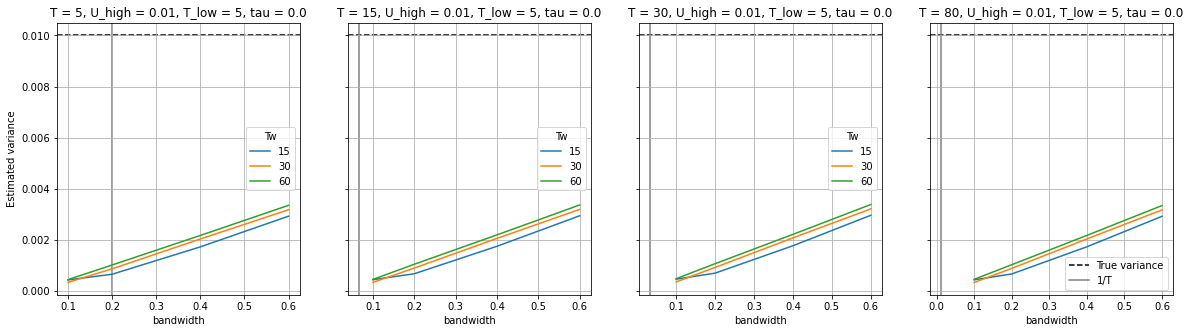

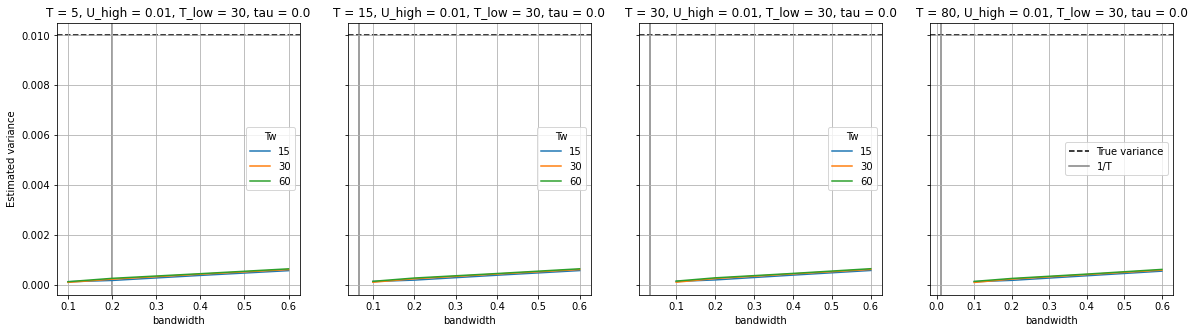

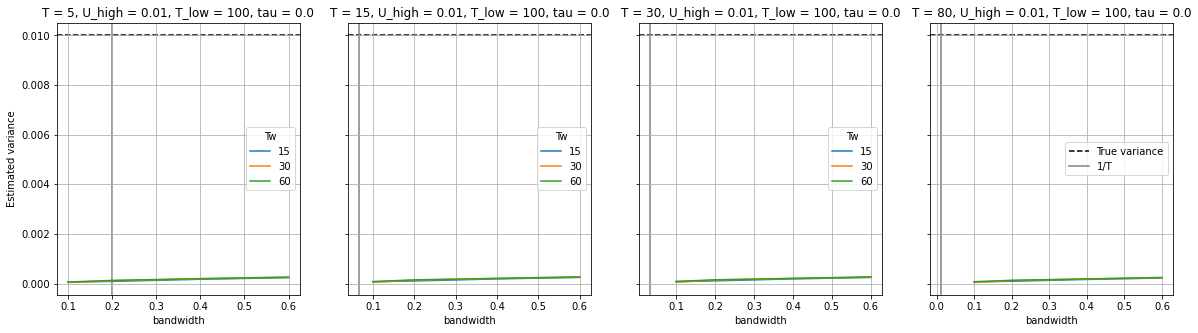

In [76]:
for tl in Var.T_low:
    fig,ax = plt.subplots(1,Var.T.size,figsize=(5*Var.T.size,5),sharey=True)
    for i,t in enumerate(Var.T):
        Var_40.sel(T_low=tl,U_high=0.01,T=t).total.plot(hue='Tw',ax=ax[i],add_legend=True)
        ax[i].grid();ax[i].axhline(0.01,c='k',linestyle='--',zorder=0,label='True variance')
        ax[i].set_ylabel('');ax[i].axvline(1/t,c='grey',zorder=0,label='1/T')
    ax[0].set_ylabel('Estimated variance')
    ax[-1].legend();

<Figure size 432x288 with 0 Axes>

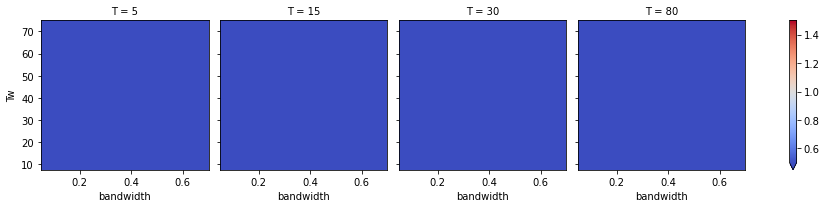

<Figure size 432x288 with 0 Axes>

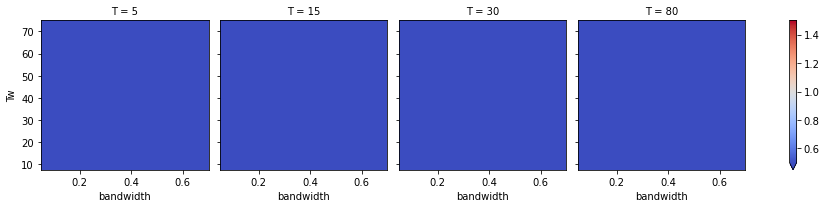

<Figure size 432x288 with 0 Axes>

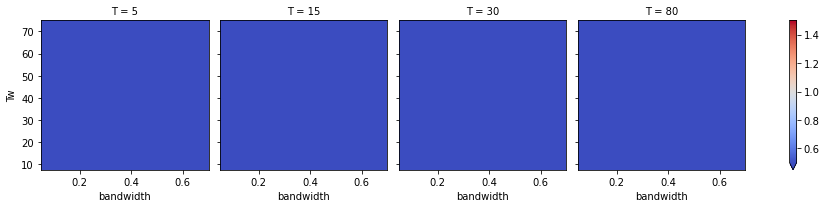

<Figure size 432x288 with 0 Axes>

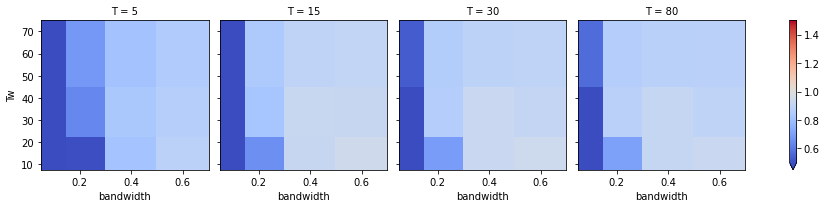

<Figure size 432x288 with 0 Axes>

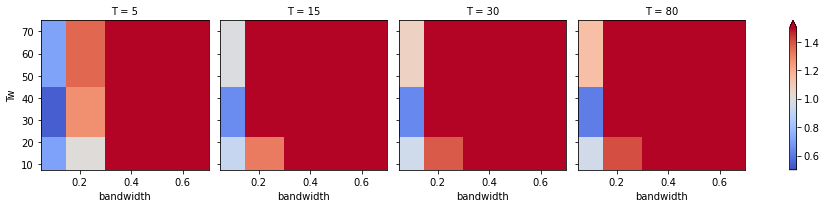

In [125]:
for U in Var.U_high:
    plt.figure()
    (ds.sel(T_low=5,U_high=U).total_demodulated_var/(true_var.sel(U_high=U))).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

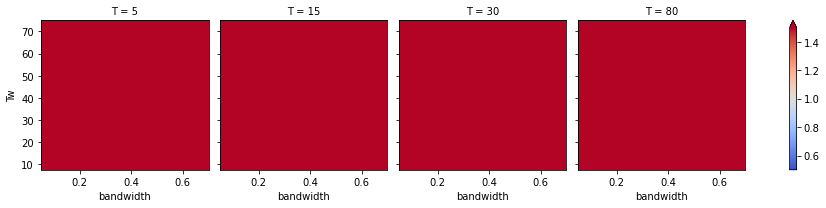

<Figure size 432x288 with 0 Axes>

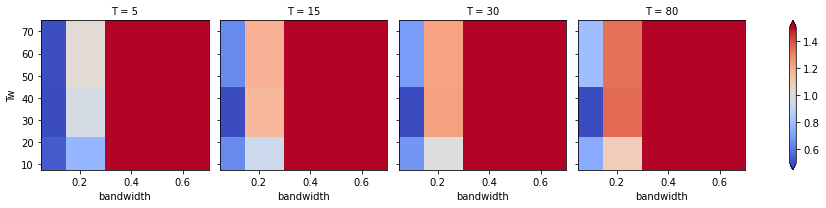

<Figure size 432x288 with 0 Axes>

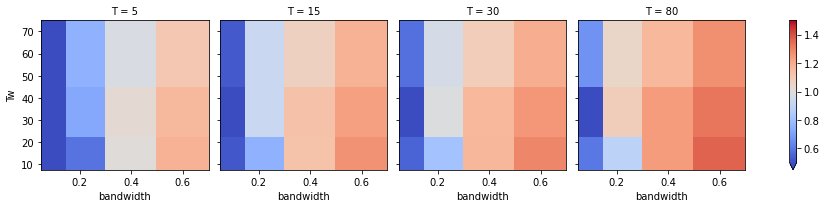

<Figure size 432x288 with 0 Axes>

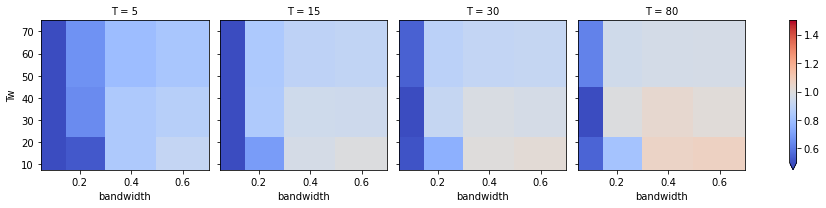

<Figure size 432x288 with 0 Axes>

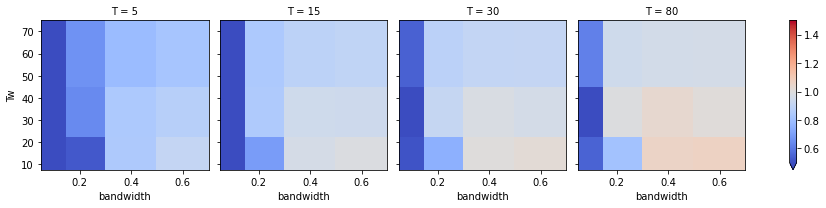

In [76]:
for U in Var.U_high:
    plt.figure()
    (ds.sel(T_low=5,U_high=U).total/(true_var.sel(U_high=U))).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

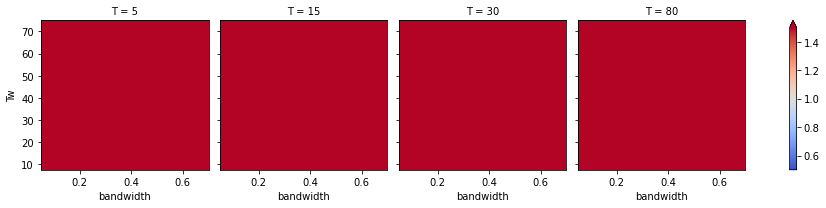

<Figure size 432x288 with 0 Axes>

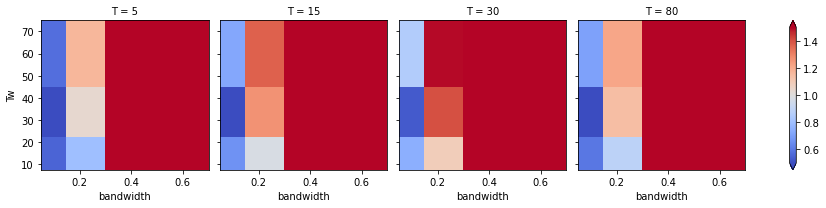

<Figure size 432x288 with 0 Axes>

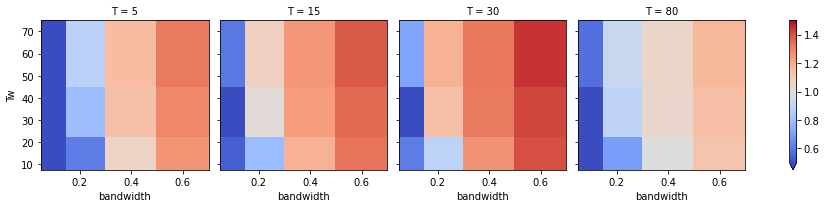

<Figure size 432x288 with 0 Axes>

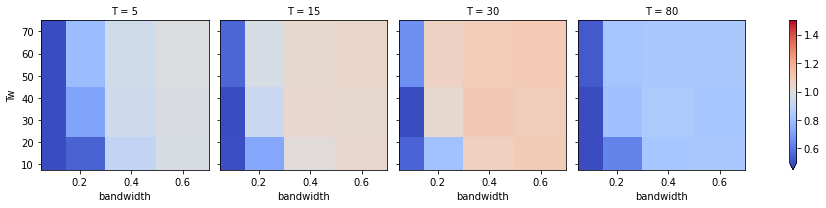

In [77]:
for U in Var.U_high:
    plt.figure()
    (Var_40.sel(T_low=5,U_high=U).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

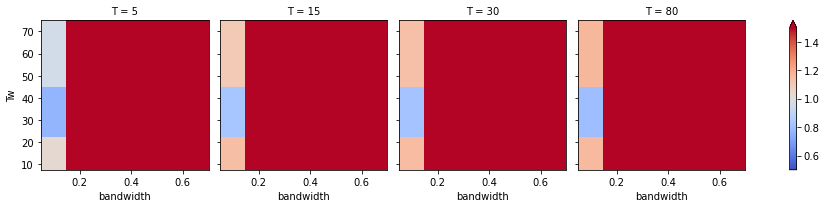

<Figure size 432x288 with 0 Axes>

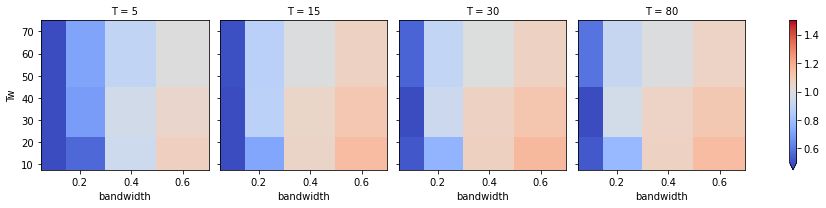

<Figure size 432x288 with 0 Axes>

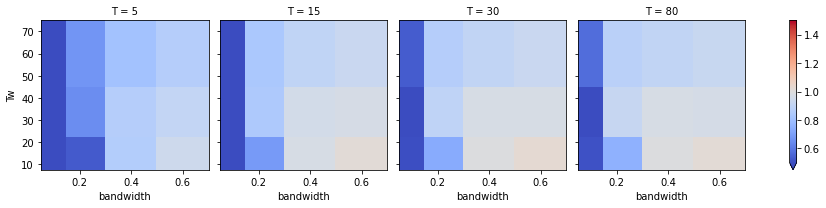

<Figure size 432x288 with 0 Axes>

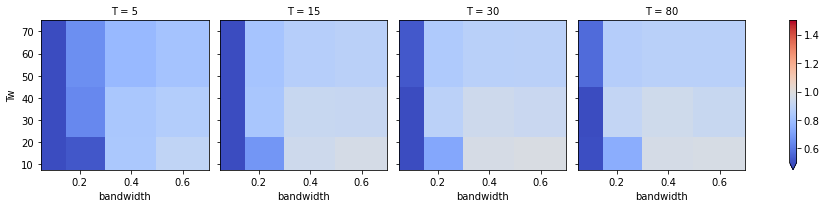

In [101]:
for U in Var.U_high:
    plt.figure()
    (Var.sel(T_low=30,U_high=U).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

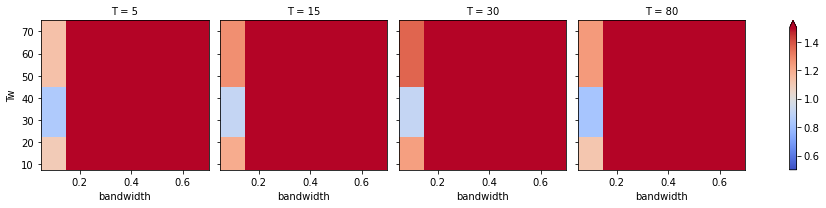

<Figure size 432x288 with 0 Axes>

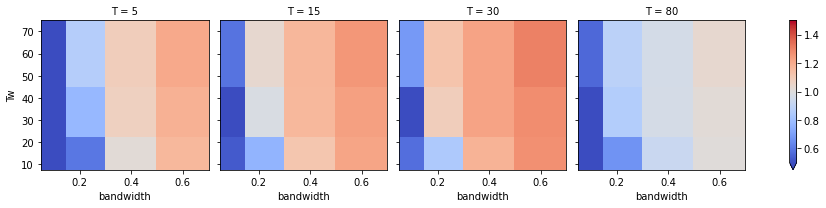

<Figure size 432x288 with 0 Axes>

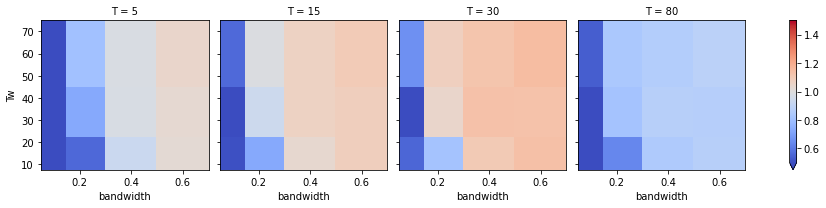

<Figure size 432x288 with 0 Axes>

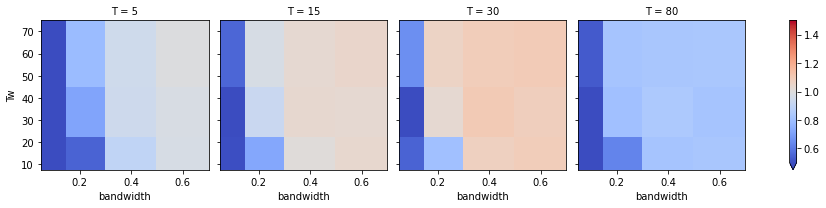

In [78]:
for U in Var.U_high:
    plt.figure()
    (Var_40.sel(T_low=30,U_high=U).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

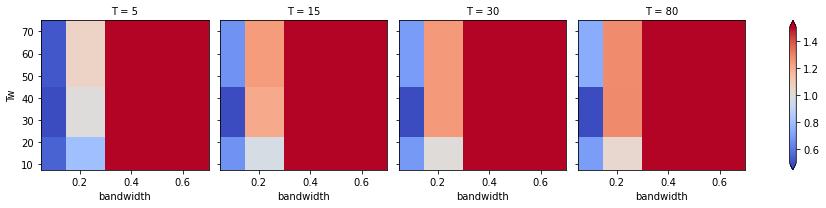

<Figure size 432x288 with 0 Axes>

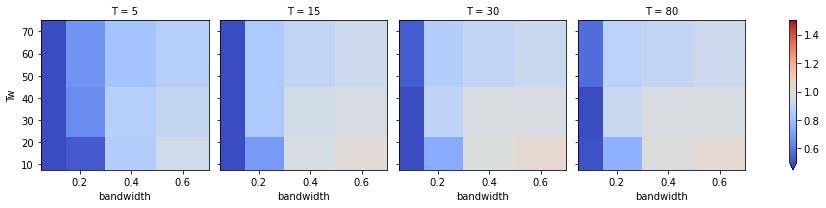

<Figure size 432x288 with 0 Axes>

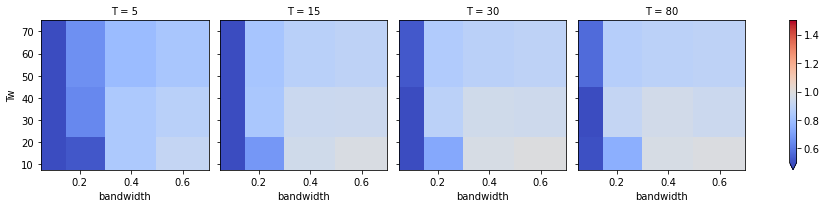

<Figure size 432x288 with 0 Axes>

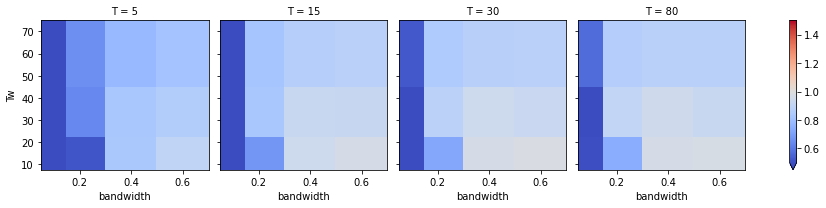

In [51]:
for U in Var.U_high:
    plt.figure()
    (Var.sel(T_low=100,U_high=U).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

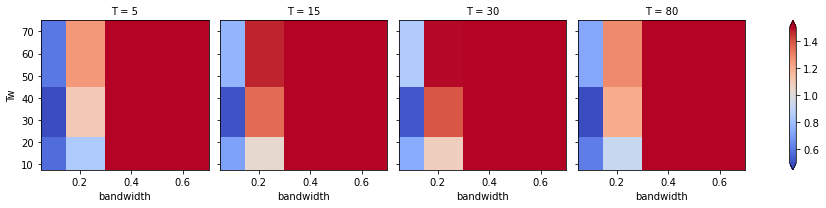

<Figure size 432x288 with 0 Axes>

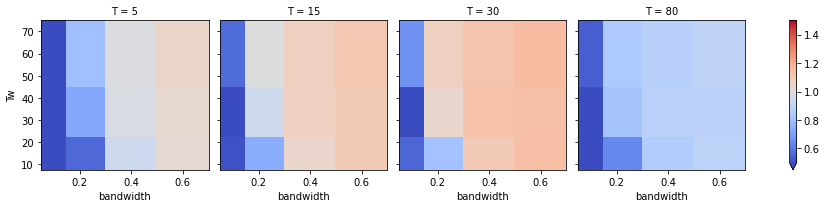

<Figure size 432x288 with 0 Axes>

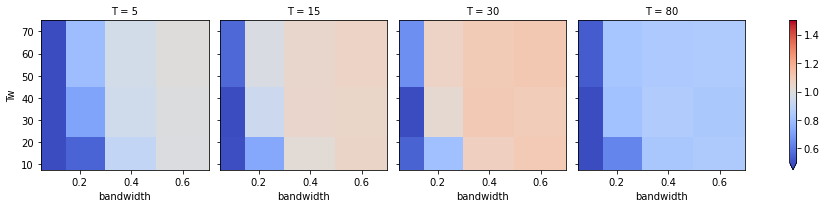

<Figure size 432x288 with 0 Axes>

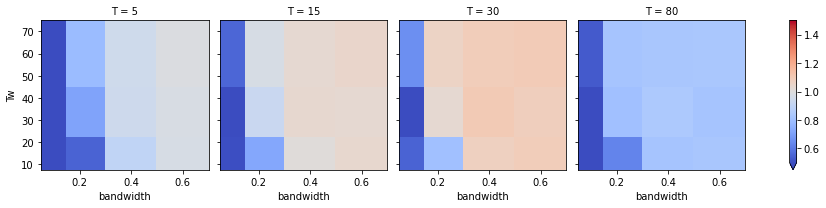

In [80]:
for U in Var.U_high:
    plt.figure()
    (Var_40.sel(T_low=100,U_high=U).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

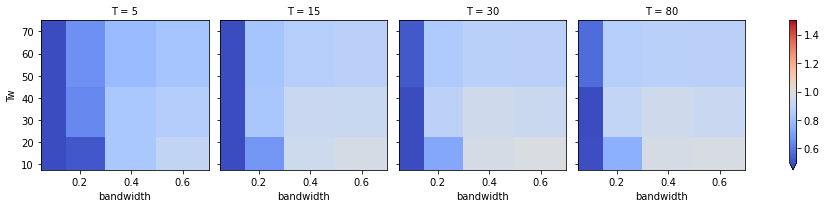

<Figure size 432x288 with 0 Axes>

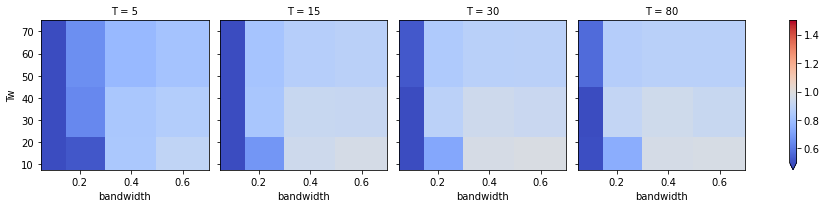

<Figure size 432x288 with 0 Axes>

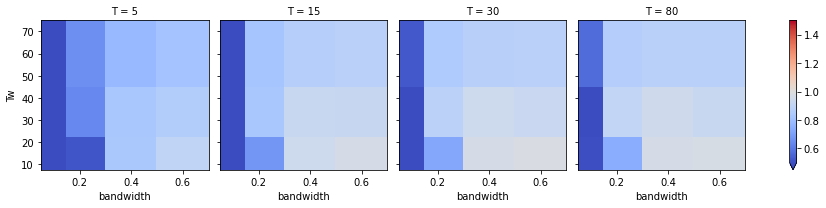

In [52]:
for tl in Var.T_low:
    plt.figure()
    (Var.sel(T_low=tl,U_high=1.).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

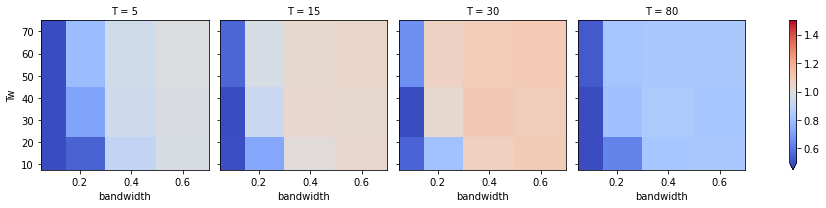

<Figure size 432x288 with 0 Axes>

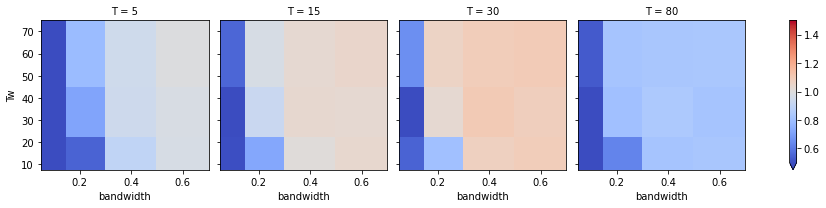

<Figure size 432x288 with 0 Axes>

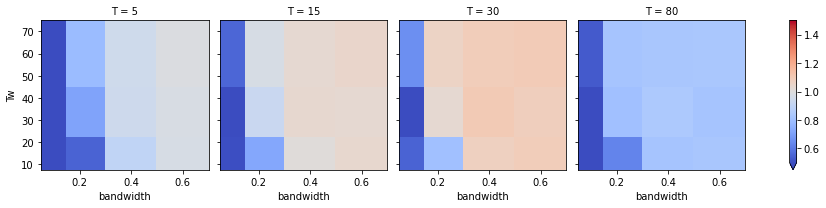

In [82]:
for tl in Var.T_low:
    plt.figure()
    (Var_40.sel(T_low=tl,U_high=1.).total/(U**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

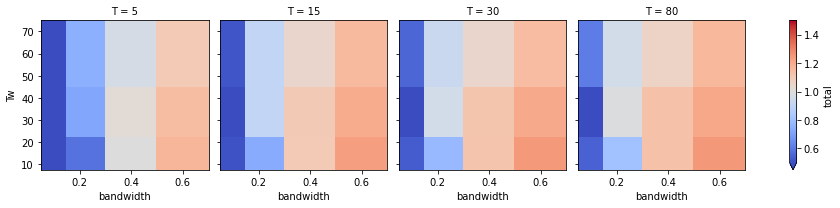

<Figure size 432x288 with 0 Axes>

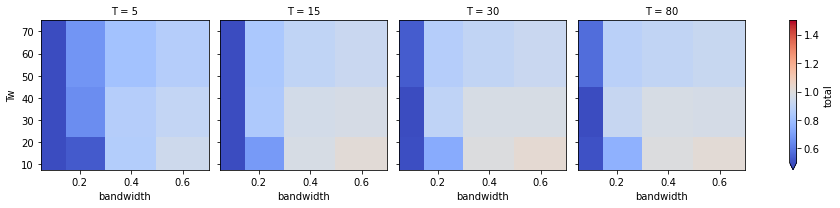

<Figure size 432x288 with 0 Axes>

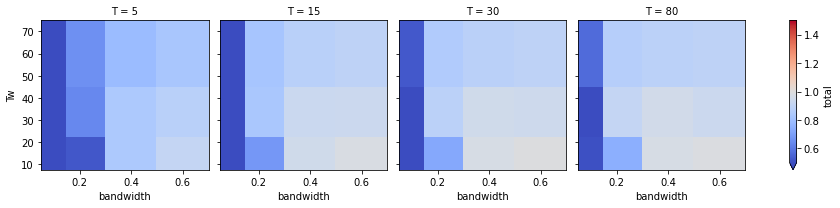

In [54]:
for tl in Var.T_low:
    plt.figure()
    (Var.sel(T_low=tl,U_high=0.1).total/(0.1**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

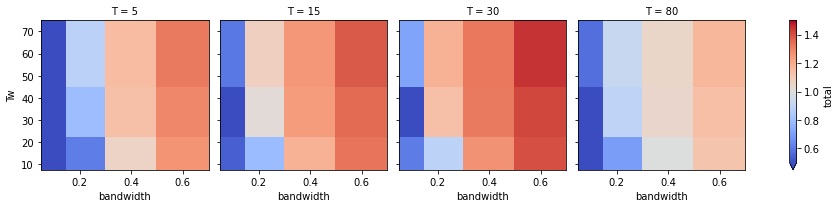

<Figure size 432x288 with 0 Axes>

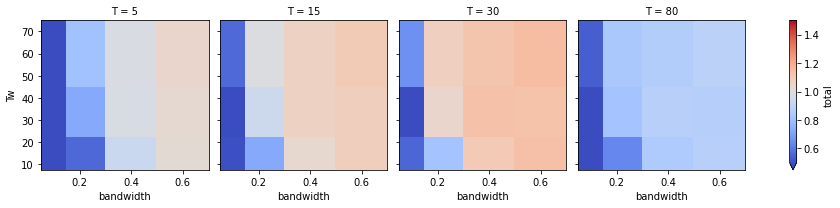

<Figure size 432x288 with 0 Axes>

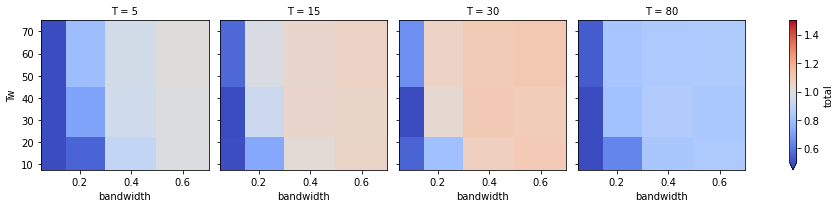

In [83]:
for tl in Var.T_low:
    plt.figure()
    (Var_40.sel(T_low=tl,U_high=0.1).total/(0.1**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

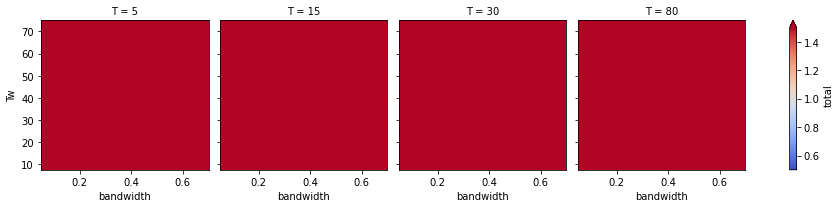

<Figure size 432x288 with 0 Axes>

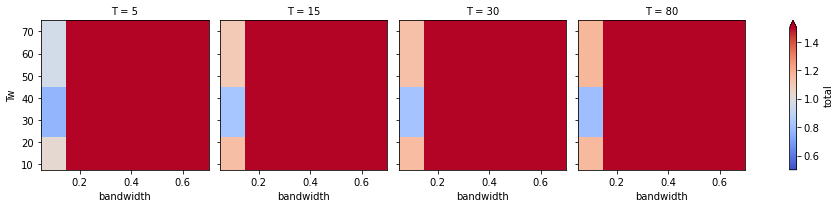

<Figure size 432x288 with 0 Axes>

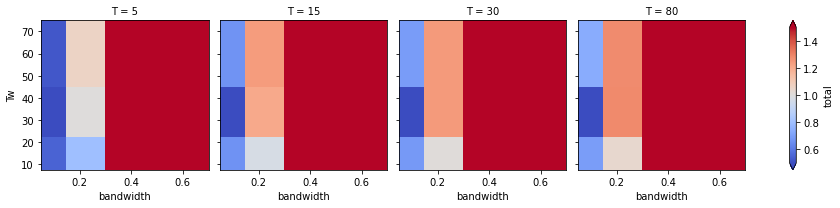

In [55]:
for tl in Var.T_low:
    plt.figure()
    (Var.sel(T_low=tl,U_high=0.01).total/(0.01**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)

<Figure size 432x288 with 0 Axes>

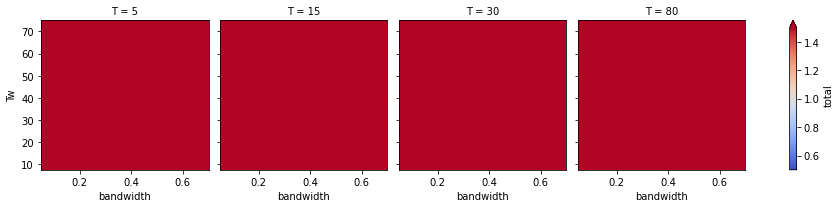

<Figure size 432x288 with 0 Axes>

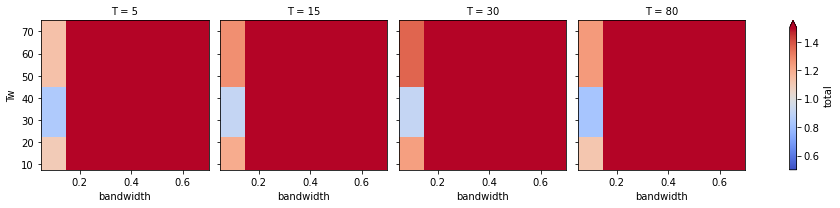

<Figure size 432x288 with 0 Axes>

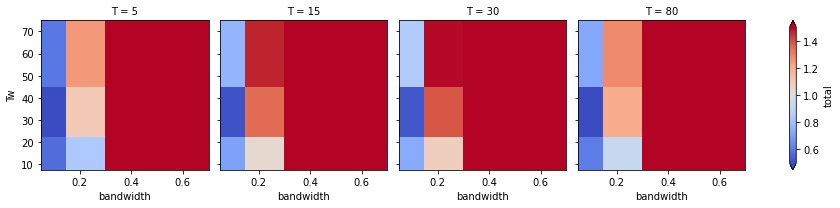

In [84]:
for tl in Var.T_low:
    plt.figure()
    (Var_40.sel(T_low=tl,U_high=0.01).total/(0.01**2)).plot(col='T',cmap='coolwarm',vmax=1.5,vmin=0.5)